<a href="https://colab.research.google.com/github/raflywitjaksana/latihan2/blob/main/Latihan_2_Kelompok_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#load iris data; pairwise plots
iris = datasets.load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)

### Sepal Length vs Sepal **Width**

# 3 Group Clustering

Sepal Length vs Sepal Width Clustering With K Means = 3

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,0:2])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,0:2])
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,0:2], y_cluster_kmeans)
score

0.4450525692083638

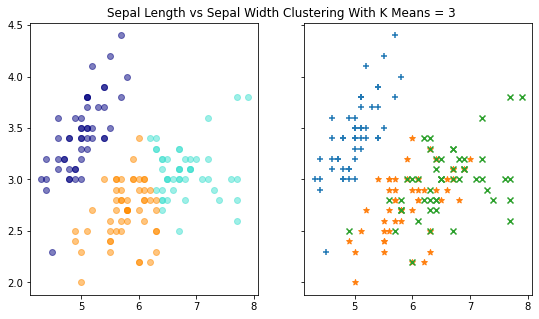

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris.data[:,0:2])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 0], data_kmeanslabels[:,1], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 0], data_truelabels[:, 1], marker=markers[n])
plt.title("Sepal Length vs Sepal Width Clustering With K Means = 3",x=-0.1)
plt.show()

Sepal Length vs Sepal Width with GMM

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

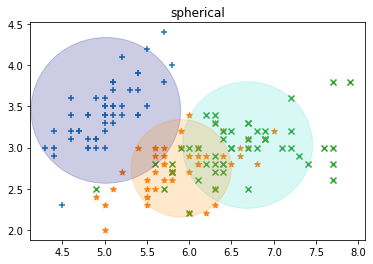

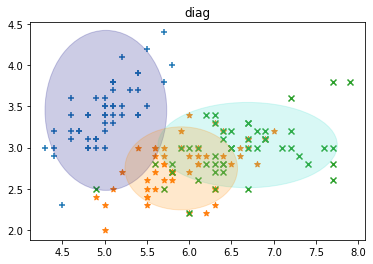

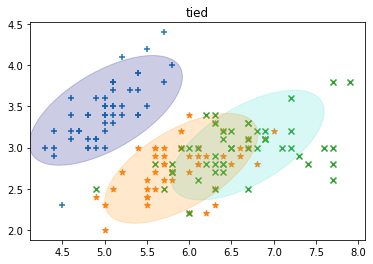

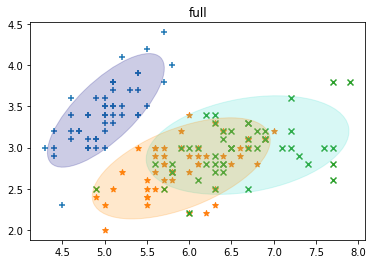

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# 2 Group Clustering

In [ ]:
from sklearn.cluster import KMeans

nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,0:2])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,0:2])
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,0:2], y_cluster_kmeans)
score

0.4629549773635977

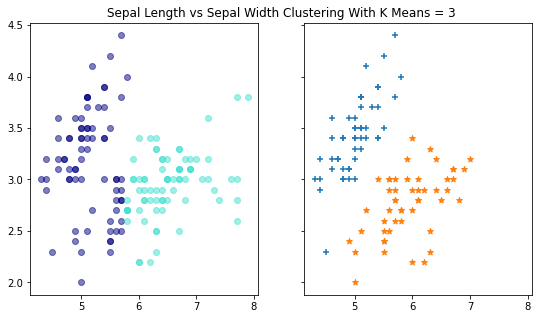

In [ ]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(iris.data[:,0:2])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 0], data_kmeanslabels[:,1], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 0], data_truelabels[:, 1], marker=markers[n])
plt.title("Sepal Length vs Sepal Width Clustering With K Means = 3",x=-0.1)
plt.show()

Sepal Length vs Sepal Width with GMM

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=2,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

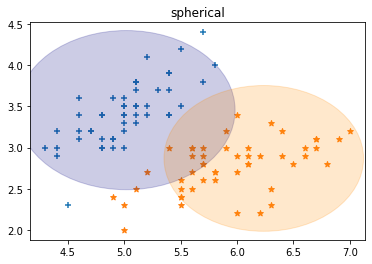

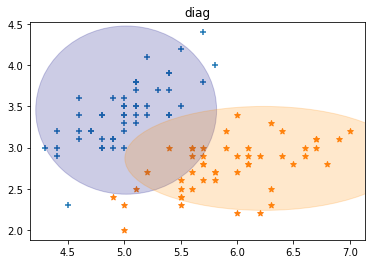

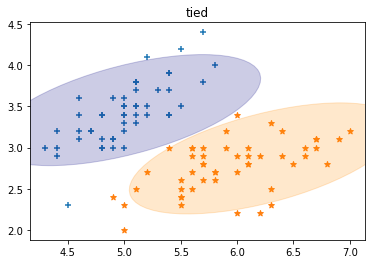

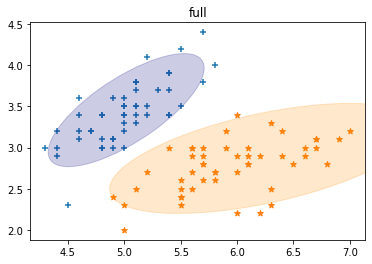

In [ ]:
colors = ['navy', 'darkorange']
markers = ['+','*']

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# 5 Group Clustering

In [ ]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,0:2])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,0:2])
y_cluster_kmeans

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 3, 3, 3, 1, 3, 1, 3, 0, 3, 0, 0, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 2, 3, 2,
       3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,0:2], y_cluster_kmeans)
score

0.41591694093833986

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=5,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

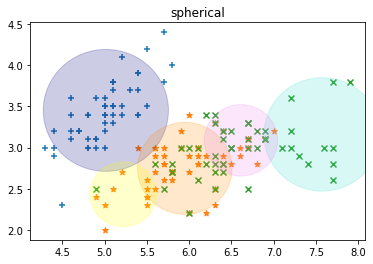

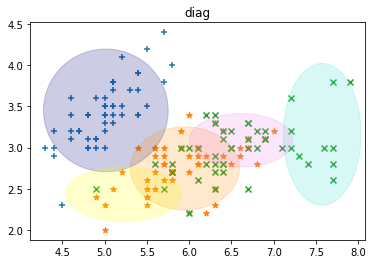

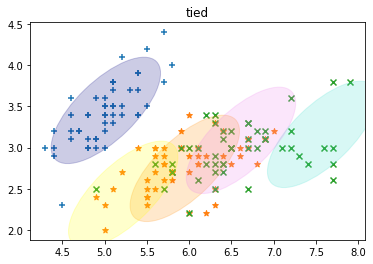

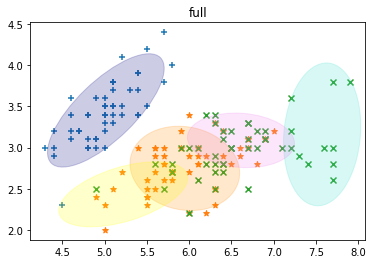

In [ ]:
colors = ['navy', 'turquoise', 'darkorange',"violet","yellow"]
markers = ['+','*','x',"o","D"]

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# Petal Length vs Petal Width

# 3 Group Clustering

Petal Length vs Petal Width Clustering 

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,2:4])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,2:4])
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,2:4], y_cluster_kmeans)
score

0.6604800083974887

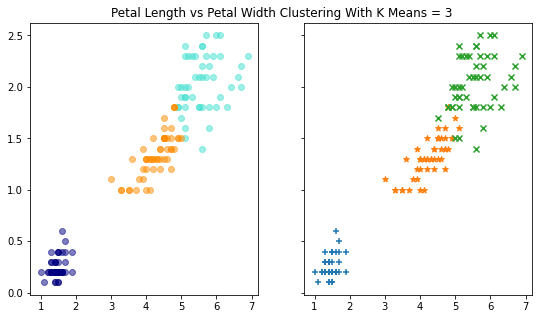

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:,3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.title("Petal Length vs Petal Width Clustering With K Means = 3",x=-0.1)
plt.show()

Petal Length vs Petal Width With GMM

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

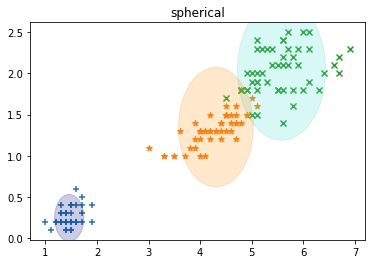

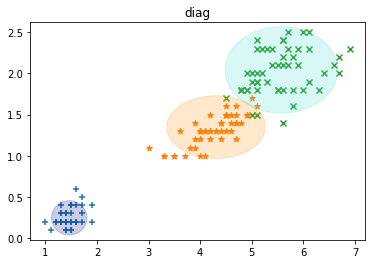

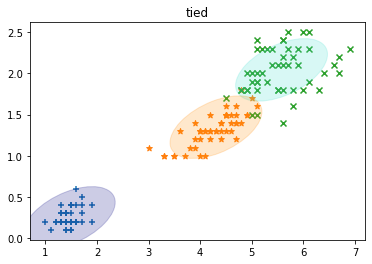

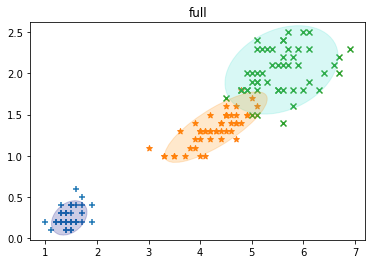

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# 2 Group Clustering

In [ ]:
from sklearn.cluster import KMeans

nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,2:4])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,2:4])
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,2:4], y_cluster_kmeans)
score

0.7653904101258123

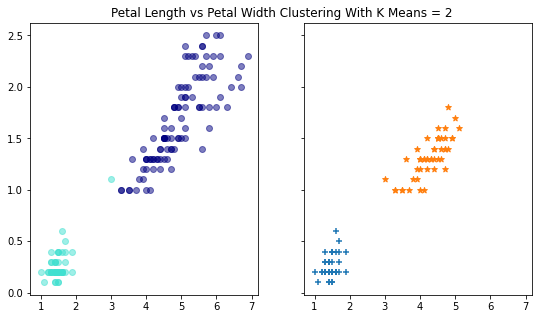

In [ ]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:,3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.title("Petal Length vs Petal Width Clustering With K Means = 2",x=-0.1)
plt.show()

Petal Length vs Petal Width With GMM

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=2,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

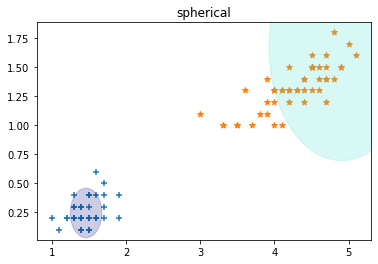

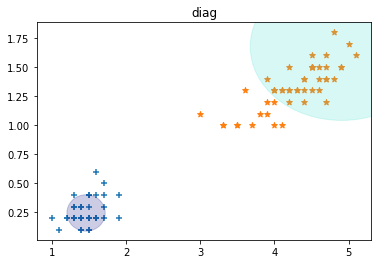

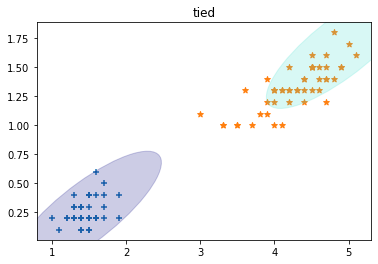

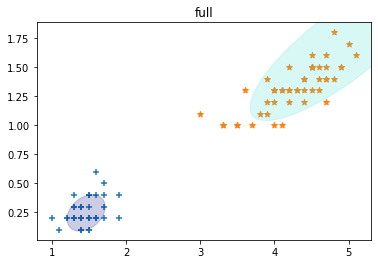

In [ ]:
colors = ['navy', 'turquoise']
markers = ['+','*']

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 1.5 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# 5 Groups Clustering

In [ ]:
from sklearn.cluster import KMeans

nclusters = 5 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(iris.data[:,2:4])

# predict the cluster for each data point
y_cluster_kmeans = km.predict(iris.data[:,2:4])
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 4, 2, 4, 4, 2, 1, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 4, 4, 2, 1, 4, 2, 1, 1, 4, 4, 2, 2,
       4, 1, 4, 2, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(iris.data[:,2:4], y_cluster_kmeans)
score

0.5883732712110276

Petal Length vs Petal Width With GMM

In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=5,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


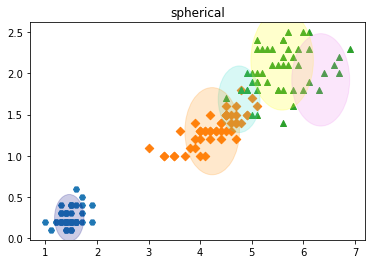

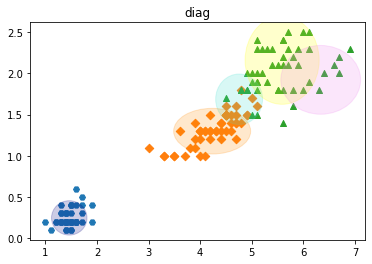

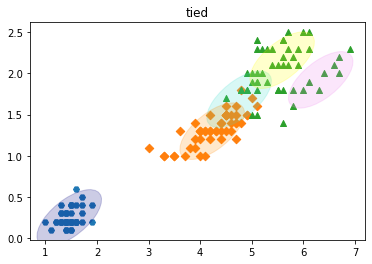

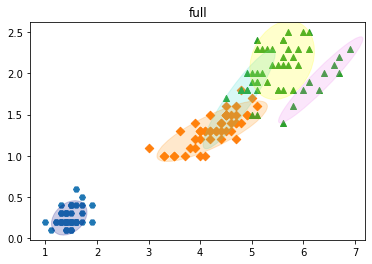

In [ ]:
colors = ['navy', 'turquoise', 'darkorange',"yellow","violet"]
markers = ["H","D","^","+","*"]

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

# Kesimpulan

Jadi dari clustering yang telah kami buat diatas dapat ditemukan kelemahan dari metode K-means yaitu, apabila menggunakan metode K-means, berdasarkan silhouette score clustering yang terbaik akan selalu dapat dicapai dengan membaginya menjadi 2 group, akan tetapi metode GMM dapat menghasilkan kesimpulan yang lebih baik, dengan visualisasinya kita dapat melihat bahwa clustering terbaik adalah dengan membagi menjadi 3 group, hal ini berlaku baik di Sepal Length vs Sepal Width maupun di Petal Length vs Petal Width.